# Data Manipulation in Python

## Learning Objectives
By the end of this practical lab you will be able to:

* Create common objects used to store data
* Read tabular and spatial data formats into Python
* Subset and merge data
* Manipulate data and calculate new values

## Arrays and Data Frames
Two main object types that can be used to store tabular data in Python include the data frame and array. Each column of a data frame must be a single type, but different columns can be different types (e.g. string, float, etc.); all the columns of an array must be the same type. You can create these within Python manually or by reading in other common formats such as spreadsheets or csv files.

Data frames are found in the Pandas package.

In [1]:
import numpy as np
import pandas as pd

#Create two arrays
years = range(2010, 2018) #creates a list of consecutive integers from 2010 to 2017
a = np.repeat(years, 4) #this uses numpy's repeat() function to repeat values
b = np.random.randint(0, 40, 32) # the randint() function can be used to generate random integers - in this case 32 values between 0 and 40
#Create data frame
c = pd.DataFrame({'a':a,'b':b})  #the curly brackets indicate a dictionary

The last line says to make a two column data frame, where the first column is called `'a'` and has the values from the `a` array, and the second column is called `'b'` and contains the values from the `b` array.

You can type `c` into the console to return the whole data frame, however, you might just want to look at the top few rows. This can be achieved with the `head()` method:

In [2]:
#head returns the top five rows
c.head()

,a,b
0,2010,37
1,2010,8
2,2010,39
3,2010,22
4,2011,1


Arrays were seen in the previous practical; they are found in the Numpy package.

In [3]:
#Create a list of numbers
a = range(0, 25) #the range function generates a range of integers

b = np.array(a) #creates a one dimensional array
b = b.reshape(5,5) #create an array with 5 rows and 5 columns
b

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

It is possible to multiply a numeric array by a constant or another array

In [4]:
#Multiply b by 10
b * 10

array([[  0,  10,  20,  30,  40],
       [ 50,  60,  70,  80,  90],
       [100, 110, 120, 130, 140],
       [150, 160, 170, 180, 190],
       [200, 210, 220, 230, 240]])

In [5]:
#Multiply b * b
b * b 

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196],
       [225, 256, 289, 324, 361],
       [400, 441, 484, 529, 576]])

Extracting elements from a one dimensional array is the same as a list; for a two dimensional array the slicing is formatted as [row number, column number]. For example:

In [6]:
#Extract the 0 position row
b[0,:]  #the colon means give all elements along that dimension

array([0, 1, 2, 3, 4])

In [7]:
#Extract 3 position column
b[:,3]

array([ 3,  8, 13, 18, 23])

In [8]:
#Extract the 2 and 3 position columns
b[:,2:4] # The colon is used to define a numeric vector between the two numbers

array([[ 2,  3],
       [ 7,  8],
       [12, 13],
       [17, 18],
       [22, 23]])

In [9]:
#Extract 0 and 3 position rows
b[[0,3],:] # The list ([0,3]) is used to identify the indexes to be extracted

array([[ 0,  1,  2,  3,  4],
       [15, 16, 17, 18, 19]])

In [10]:
#Extract the value in the 2 position row and 3 position column
b[2,3]

13

In the data frame that you created earlier, you can use a similar notation to extract values based on the row and column indexes. It is formatted as `.iloc[row index, column index]`.

In [11]:
c.iloc[23,1]

24

Data frames can have named rows and columns, which can be used for indexing. It is formatted as `loc[row name, column name]`

In [12]:
c.loc[23,'b']

24

You can also reference the column names themselves using dot notation, for example:

In [13]:
#Return all the values in the column called "a"
c.a

0     2010
1     2010
2     2010
3     2010
4     2011
5     2011
6     2011
7     2011
8     2012
9     2012
10    2012
11    2012
12    2013
13    2013
14    2013
15    2013
16    2014
17    2014
18    2014
19    2014
20    2015
21    2015
22    2015
23    2015
24    2016
25    2016
26    2016
27    2016
28    2017
29    2017
30    2017
31    2017
Name: a, dtype: int32

In [14]:
#A different way of returning the column called "a"
c["a"]

0     2010
1     2010
2     2010
3     2010
4     2011
5     2011
6     2011
7     2011
8     2012
9     2012
10    2012
11    2012
12    2013
13    2013
14    2013
15    2013
16    2014
17    2014
18    2014
19    2014
20    2015
21    2015
22    2015
23    2015
24    2016
25    2016
26    2016
27    2016
28    2017
29    2017
30    2017
31    2017
Name: a, dtype: int32

In [15]:
#Yet another way of returning the column called "a"
c.loc[:,"a"]

0     2010
1     2010
2     2010
3     2010
4     2011
5     2011
6     2011
7     2011
8     2012
9     2012
10    2012
11    2012
12    2013
13    2013
14    2013
15    2013
16    2014
17    2014
18    2014
19    2014
20    2015
21    2015
22    2015
23    2015
24    2016
25    2016
26    2016
27    2016
28    2017
29    2017
30    2017
31    2017
Name: a, dtype: int32

We can also find out what a data frame's column names are using the `columns` attribute:

In [16]:
c.columns

Index(['a', 'b'], dtype='object')

We can also rename the columns:

In [17]:
c = c.rename(columns={'a': 'Year', 'b': 'Count'})
c.head()

,Year,Count
0,2010,37
1,2010,8
2,2010,39
3,2010,22
4,2011,1


## Getting External Data into Python

For most urban analytics you are more likely to be reading external data into Python rather than creating data objects from scratch. Tabular data is commonly stored in text files such as CSV, or on spreadsheets; and explicitly spatial data will likely be stored in formats such as Shapefiles. In this section you will learn how to read data stored in these formats into Python.

### Reading Tabular Data

A common way in which data can be stored externally are the use of `.csv` files. These are text files, and have a very simple format where columns of attributes are separated by a comma, and each row by a carriage return.

Note: There are a range of different delimiters which can be used in addition to a comma, with the most common being tab; although sometimes characters not commonly used such as bar/pipe (`|`) will be used.

In the following example you will read in some U.S. Census Bureau, 2010-2014 American Community Survey (ACS) 5-Year Estimate data. This was downloaded from the [American Fact Finder](https://factfinder.census.gov) website. The data are for census tracts in San Francisco and relate to median earnings in the past 12 months.

Reading CSV files into Python uses pandas `read_csv` function:

In [18]:
#Read CSV file - creates a data frame called earnings
earnings = pd.read_csv("data/ACS_14_5YR_S2001_with_ann.csv")

#Show column headings
earnings.columns

#UID - Tract ID
#pop - estimated total population over 16 with income
#pop_m - estimated total population over 16 with income (margin of error)
#earnings - estimated median earnings
#earnings_m - estimated median earnings (margin of error)

Index(['UID', 'pop', 'pop_m', 'earnings', 'earnings_m'], dtype='object')

It is possible to show the structure of the object using the `info()` method.

In [19]:
earnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 5 columns):
UID           197 non-null int64
pop           197 non-null int64
pop_m         197 non-null int64
earnings      197 non-null object
earnings_m    197 non-null object
dtypes: int64(3), object(2)
memory usage: 7.8+ KB


This shows that the object is a Pandas data frame with 197 rows and 5 variables. For each of the attributes the class is shown (e.g. `int64` indicates integer). The `read_csv()` function guesses the column types when the data are read into Python.

One issue you might notice is that the earnings and earnings_m variables have been read in as an `object`. The reason these columns were not read as integers (like the UID, pop, pop_m) is the presence of two non-numeric values which are shown as "*" and "-". In ACS data these two symbols indicate that the sample sizes were either no sample observations or too few sample observations to make a calculation.

Issues such as these are quite common when reading in external data; and we will look at how this can be corrected later.

Not all tabular data are distributed as textfiles, and another very common format is Microsoft Excel format - .xls or xlsx.

The following code downloads an Excel File from the [London Data Store](https://data.london.gov.uk/) and then reads this into Python.

In [20]:
import urllib.request
url = "https://files.datapress.com/london/dataset/number-bicycle-hires/2016-11-16T08:14:05/tfl-daily-cycle-hires.xls"
urllib.request.urlretrieve(url, "data/tfl-daily-cycle-hires.xls")

('data/tfl-daily-cycle-hires.xls', <http.client.HTTPMessage at 0x1f811787ef0>)

In [22]:
#Read workbook
cycle_hire = pd.read_excel("data/tfl-daily-cycle-hires.xls", sheet_name='Data')

### Reading Spatial Data

Spatial data are distributed in a variety of formats, but commonly as Shapefiles. These can be read into Python using a number of packages, however, is illustrated here with "geopandas". First we need to install GeoPandas:

In [23]:
#Download and install package

#### You only need to run the following lines the first time you run this notebook ####
#import sys
#!{sys.executable} -m pip install geopandas  # pip has a more robust geopandas installer at this time
#!conda install --yes --prefix {sys.prefix} -c conda-forge rtree # spatial index to improve performance

The following code loads a Census Tract Shapefile which was downloaded from the [SF OpenData](https://data.sfgov.org/Geographic-Locations-and-Boundaries/Census-2010-Tracts-for-San-Francisco/rarb-5ahf/data).

In [24]:
#Load package
import geopandas as gpd

# Read Shapefile
SF = gpd.read_file("data/tl_2010_06075_tract10.shp")

This has created a geo data frame object, which is similar to the data frame you created earlier. You can view the tract boundaries using the `plot()` method:

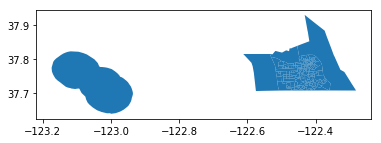

In [25]:
#This is a "magic", which allows figures to be rendered inside the notebook (it only needs to be run once in Notebook)
%matplotlib inline

SF.plot()  # map the data

The San Francisco peninsula is shown, however, the formal boundaries extend into the ocean and also include the Farallon Islands. For cartographic purposes it may not be desirable to show these extents, and later we will explore how these can be cleaned up.

A geo data frame is structured like a regular data frame, with rows being observations and columns being attributes on those observations. The key difference is that a geo data frame has a `geometry` column that contains the spatial coordinates on each record. You can access the `geometry` like you would any column:

In [26]:
#Show the top rows of the geometry column
SF.geometry.head()

0    POLYGON ((-122.446471 37.775802, -122.44478 37...
1    POLYGON ((-122.44034 37.77658, -122.439844 37....
2    POLYGON ((-122.429152 37.778007, -122.428909 3...
3    POLYGON ((-122.428909 37.778039, -122.429152 3...
4    POLYGON ((-122.420425 37.780583, -122.420336 3...
Name: geometry, dtype: object

A geo data frame contains other useful information such as the spatial [projection](https://en.wikipedia.org/wiki/Spatial_reference_system).

In [27]:
SF.crs

{'init': 'epsg:4269'}

### Creating Spatial Data

Sometimes it is necessary to create a spatial object from scratch, which is most common for point data given that only a single co-ordinate is required for each feature. This can be achieved by building a `GeoDataFrame()` object and is used within this example to create a 311 point dataset. 311 data record non emergency calls within the US, and in this case are those which occurred within San Francisco between January and December 2016. The 311 data used here have been simplified from the [original](https://data.sfgov.org/City-Infrastructure/Case-Data-from-San-Francisco-311-SF311-/vw6y-z8j6/data) data to only a few variables, and those calls without spatial references have been removed.

In [28]:
# Read csv into Python
data_311 = pd.read_csv("data/311.csv")
# Have a look at the structure
data_311.head()

,CaseID,Category,Lat,Lon
0,6405492,Street Defects,37.822688,-122.363150
1,6590944,Sewer Issues,37.810543,-122.363370
2,5646247,Abandoned Vehicle,37.728618,-122.364671
3,5547584,Graffiti Public Property,37.725278,-122.365803
4,6407484,Street and Sidewalk Cleaning,37.725411,-122.365850


Each spatial object in a geo data frame must be an point, line or polygon. GeoPandas uses spatial object types from the shapely package. In this example we use the `Point` type.

In [29]:
# Create a geo data frame
from shapely.geometry import Point  # import just the Point class from the shapely package
geom = [Point(xy) for xy in zip(data_311.Lon, data_311.Lat)] #create a list of latitude, longitude pairs
SP_311 = gpd.GeoDataFrame(data_311, crs=SF.crs, geometry=geom)

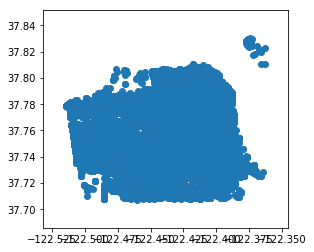

In [30]:
# Show the results
SP_311.plot()

## Subsetting Data

It is often necessary to subset data; either restricting a data frame to a set of columns or rows; or in the case of spatial data, creating an extract for a particular set of geographic features. Subsetting can occur in a number of different ways

In [31]:
#Get the frequencies by the categories used within the 311 data
data_311.Category.value_counts()

Street and Sidewalk Cleaning    41683
Graffiti Public Property         9500
Graffiti Private Property        7436
General Requests                 5976
Abandoned Vehicle                5655
Sewer Issues                     2432
Streetlights                     2155
Street Defects                   2146
Damaged Property                 1966
MUNI Feedback                    1928
Sidewalk or Curb                 1822
Tree Maintenance                 1764
Litter Receptacles               1552
Rec and Park Requests            1304
Sign Repair                      1219
Illegal Postings                 1137
Temporary Sign Request           1045
Blocked Street or SideWalk        941
SFHA Requests                     693
Noise Report                      626
Residential Building Request      295
311 External Request              179
Catch Basin Maintenance           161
Color Curb                        146
Interdepartmental Request          90
DPW Volunteer Programs              7
Unpermitted 

In [32]:
# Use the loc method to extract rows from the data which relate to Sewer Issues
sewer_issues = data_311.loc[data_311.Category=="Sewer Issues", :]

# Use the square brackets "[]" to perform the same task
sewer_issues = data_311[data_311.Category=="Sewer Issues"]
sewer_issues.head()  #check out the first rows

,CaseID,Category,Lat,Lon,geometry
1,6590944,Sewer Issues,37.810543,-122.363370,POINT (-122.3633696 37.8105431)
6,5514170,Sewer Issues,37.810496,-122.366410,POINT (-122.3664104 37.81049584)
30,6434120,Sewer Issues,37.733436,-122.371634,POINT (-122.3716338 37.73343591)
33,6497361,Sewer Issues,37.733436,-122.371634,POINT (-122.3716338 37.73343591)
50,5518467,Sewer Issues,37.731561,-122.373326,POINT (-122.3733263 37.73156116)


In [33]:
# Extract the IDs for the "Sewer Issues"
sewer_issues_IDs = data_311.loc[data_311.Category=="Sewer Issues", "CaseID"]
sewer_issues_IDs.head()  #check out the first elements

1     6590944
6     5514170
30    6434120
33    6497361
50    5518467
Name: CaseID, dtype: int64

Subsetting can also be useful for spatial data. In the example above the full extent of San Francisco was plotted, however, for cartographic purposes it may be preferable to remove the "Farallon Islands". This has a GEOID10 of "06075980401" which can be used to remove this from a plot:

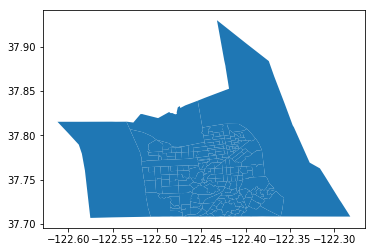

In [34]:
SF[SF.GEOID10 != "06075980401"].plot() # Removes Farallon Islands from the plot

This can also be quite useful if you want to plot only a single feature, for example:

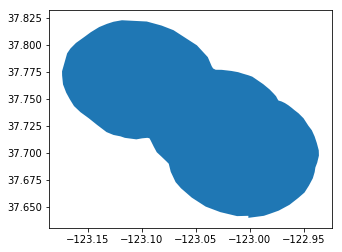

In [35]:
SF[SF.GEOID10 == "06075980401"].plot() # Only plots Farallon Islands

You can also use the same syntax to create a new object - for example:

In [36]:
SF = SF[SF.GEOID10 != "06075980401"] # Overwrites the SF object

### Clipping Spatial Data

Clipping is a process of subsetting using overlapping spatial data. The following code uses the outline of the coast of the U.S. to clip the boundaries of the SF geo data frame object. Note: it is a little slow.

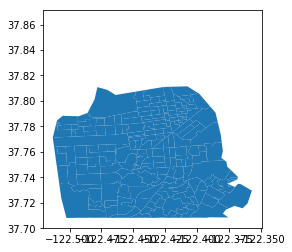

In [37]:
#Read in coastal outline (Source from - https://www.census.gov/geo/maps-data/data/cbf/cbf_counties.html)
coast = gpd.read_file("data/cb_2015_us_county_500k.shp")

coast_single = coast.unary_union  #merges the US counties into a single object
SF_clipped_geoms = SF.intersection(coast_single) # Clip the SF spatial data frame object to the coastline - just returns geometries
SF_clipped = SF.copy() #make a copy of the SF dataframe
SF_clipped['geometry'] = SF_clipped_geoms #replace the old geometries with the clipped geometries
SF_clipped = SF_clipped[SF_clipped.intersects(SF_clipped_geoms.unary_union)] #subset to just the observations in the clipped area

#Plot the results
SF_clipped.plot()

We will now perform a similar operation on the SP_311 object. This is often called a "point in polygon" operation.

In [38]:
SF_single = SF_clipped.unary_union  #merges SF tracts into a single object
SP_311_PIP = SP_311[SP_311.intersects(SF_single)] # Select the 331 points data that intersect with San Francisco

You can now see that this has subset the data to the extent of the peninsula area of San Francisco:

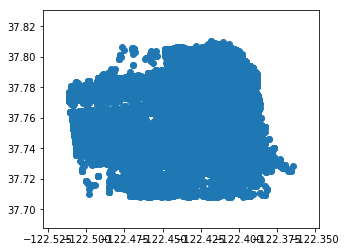

In [39]:
SP_311_PIP.plot()

## Merging Tabular Data

So far we have utilized a single data frame or spatial object; however, it is often the case that in order to generate information, data from multiple sources are required. Where data share a common "key", these can be used to combine / link tables together. This might for example be an identifier for a zone; and is one of the reasons why most statistical agencies adopt a standard set of geographic codes to identify areas.

In the earlier imported data "earnings" this included a UID column which relates to a Tract ID. We can now import an additional data table called bachelors - this also includes the same ID.

In [40]:
#Read CSV file - creates a data frame called earnings
bachelors = pd.read_csv("data/ACS_14_5YR_S1501_with_ann.csv")
bachelors.head()

#UID - Tract ID
#Bachelor_Higher - Bachelor degree or higher %
#Bachelor_Higher_m - Bachelor degree or higher % (margin of error)

,UID,Bachelor_Higher,Bachelor_Higher_m
0,6075010100,44.3,19.5
1,6075010200,58.8,30.8
2,6075010300,48.8,13.2
3,6075010400,35.9,26.1
4,6075010500,39.2,33.7


Using the matching ID columns on both datasets we can link them together to create a new object with the `merge()` function in pandas:

In [41]:
#Perform the merge
SF_Tract_ACS = pd.merge(earnings, bachelors, left_on="UID", right_on="UID")
SF_Tract_ACS = pd.merge(earnings, bachelors, on="UID") # An alternative method to the above, but a shortened version as the ID columns are the same on both data frames
#there are many more options - for more details type help(pd.merge)

#The combined data frame now looks like
SF_Tract_ACS.head() # shows the top of the data frame

,UID,pop,pop_m,earnings,earnings_m,Bachelor_Higher,Bachelor_Higher_m
0,6075010100,2371,226,49954,15503,44.3,19.5
1,6075010200,2975,315,75984,10892,58.8,30.8
2,6075010300,2748,324,47586,10549,48.8,13.2
3,6075010400,3668,442,48931,6531,35.9,26.1
4,6075010500,1562,198,110076,5331,39.2,33.7


## Removing and Creating Attributes

It is sometimes necessary to remove variables from a tabular object or to create new values. In the following example we will remove some unwanted columns in the SF_clipped object, leaving just the zone id for each polygon.

In [42]:
#Remind yourself what the data look like...
SF_clipped.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,06,075,016500,06075016500,165,Census Tract 165,G5020,S,370459,0,+37.7741958,-122.4477884,"POLYGON ((-122.446471 37.775802, -122.44478 37..."
1,06,075,016400,06075016400,164,Census Tract 164,G5020,S,309097,0,+37.7750995,-122.4369729,"POLYGON ((-122.44034 37.77658, -122.439844 37...."
2,06,075,016300,06075016300,163,Census Tract 163,G5020,S,245867,0,+37.7760456,-122.4295509,"POLYGON ((-122.429152 37.778007, -122.428909 3..."
3,06,075,016100,06075016100,161,Census Tract 161,G5020,S,368901,0,+37.7799831,-122.4286631,"POLYGON ((-122.428909 37.778039, -122.429152 3..."
4,06,075,016000,06075016000,160,Census Tract 160,G5020,S,158236,0,+37.7823363,-122.4224838,"POLYGON ((-122.420425 37.780583, -122.420336 3..."


In [43]:
SF_clipped = SF_clipped[["GEOID10", "geometry"]] #Makes a new version of the geo data frame with just the values of the GEOID10 and geometry columns

#The data frame within the data slot now looks as follows
SF_clipped.head()

,GEOID10,geometry
0,06075016500,"POLYGON ((-122.446471 37.775802, -122.44478 37..."
1,06075016400,"POLYGON ((-122.44034 37.77658, -122.439844 37...."
2,06075016300,"POLYGON ((-122.429152 37.778007, -122.428909 3..."
3,06075016100,"POLYGON ((-122.428909 37.778039, -122.429152 3..."
4,06075016000,"POLYGON ((-122.420425 37.780583, -122.420336 3..."


These tract ID are supposed to match with those in the "SF_Tract_ACS" object, however, if you are very observant you will notice that there is one issue; the above have a leading zero.

In [44]:
SF_Tract_ACS.head() # show the top of the SF_Tract_ACS object

,UID,pop,pop_m,earnings,earnings_m,Bachelor_Higher,Bachelor_Higher_m
0,6075010100,2371,226,49954,15503,44.3,19.5
1,6075010200,2975,315,75984,10892,58.8,30.8
2,6075010300,2748,324,47586,10549,48.8,13.2
3,6075010400,3668,442,48931,6531,35.9,26.1
4,6075010500,1562,198,110076,5331,39.2,33.7


As such, in this instance we will create a new column on the SF_Tract_ACS data frame with a new ID that will match the SF GEOID10 column. We can achieve this using the square brackets (`[]`) notation and will call this new variable "GEOID10".

In [45]:
# Creates a new variable with a leading zero
SF_Tract_ACS['GEOID10'] = "0" + SF_Tract_ACS.UID.astype(str) #need to convert the UID column to strings before prepending the zero
SF_Tract_ACS.head()

,UID,pop,pop_m,earnings,earnings_m,Bachelor_Higher,Bachelor_Higher_m,GEOID10
0,6075010100,2371,226,49954,15503,44.3,19.5,06075010100
1,6075010200,2975,315,75984,10892,58.8,30.8,06075010200
2,6075010300,2748,324,47586,10549,48.8,13.2,06075010300
3,6075010400,3668,442,48931,6531,35.9,26.1,06075010400
4,6075010500,1562,198,110076,5331,39.2,33.7,06075010500


If you remember from earlier in this practical, the earnings data had some values that were stored as "objects" rather than floats or integers, and the same is true for both the bachelors data; and now the combined `SF_Tract_ACS` object. We can check this again as follows:

In [46]:
SF_Tract_ACS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 8 columns):
UID                  197 non-null int64
pop                  197 non-null int64
pop_m                197 non-null int64
earnings             197 non-null object
earnings_m           197 non-null object
Bachelor_Higher      197 non-null object
Bachelor_Higher_m    197 non-null object
GEOID10              197 non-null object
dtypes: int64(3), object(5)
memory usage: 13.9+ KB


We can also remove the UID column. A quick way of doing this for a single variable is to use the `drop()` method:

In [47]:
SF_Tract_ACS = SF_Tract_ACS.drop('UID', axis=1)  #axis=1 indicates to drop a column (axis=0 is for rows)

We will now convert the object variables to numbers. The first stage will be to remove the "-" and "**" characters from the variables with the `replace` function, replacing these with NA values.

In [48]:
#Replace the "-" and "*" characters
SF_Tract_ACS.loc[SF_Tract_ACS.earnings=='-', 'earnings'] = np.nan #replace the "-" values with NA
SF_Tract_ACS.loc[SF_Tract_ACS.earnings_m=='**', 'earnings_m'] = np.nan #replace the "**" values with NA
SF_Tract_ACS.loc[SF_Tract_ACS.Bachelor_Higher=='-', 'Bachelor_Higher'] = np.nan #replace the "-" values with NA
SF_Tract_ACS.loc[SF_Tract_ACS.Bachelor_Higher_m=='**', 'Bachelor_Higher_m'] = np.nan #replace the "-" values with NA

We will now convert these to numeric values:

In [49]:
SF_Tract_ACS.earnings = SF_Tract_ACS.earnings.astype(float)
SF_Tract_ACS.earnings_m = SF_Tract_ACS.earnings_m.astype(float)
SF_Tract_ACS.Bachelor_Higher = SF_Tract_ACS.Bachelor_Higher.astype(float)
SF_Tract_ACS.Bachelor_Higher_m = SF_Tract_ACS.Bachelor_Higher_m.astype(float)

Now all the variables other than the "GEOID10" are stored as integers or floats:

In [50]:
SF_Tract_ACS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 7 columns):
pop                  197 non-null int64
pop_m                197 non-null int64
earnings             195 non-null float64
earnings_m           195 non-null float64
Bachelor_Higher      194 non-null float64
Bachelor_Higher_m    194 non-null float64
GEOID10              197 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 12.3+ KB


## Merging Spatial Data

It is also possible to join tabular data onto a spatial object (e.g. a geo data frame) in the same way as with regular data frames. In this example, we will join the newly created `SF_Tract_ACS` data onto the `SF_clipped` data frame.

In [51]:
SF_clipped = pd.merge(SF_clipped, SF_Tract_ACS, on="GEOID10") # merge
SF_clipped.head() #show the attribute data

,GEOID10,geometry,pop,pop_m,earnings,earnings_m,Bachelor_Higher,Bachelor_Higher_m
0,06075016500,"POLYGON ((-122.446471 37.775802, -122.44478 37...",3973,428,50901.0,10181.0,25.7,17.2
1,06075016400,"POLYGON ((-122.44034 37.77658, -122.439844 37....",3076,249,52870.0,7839.0,56.7,22.3
2,06075016300,"POLYGON ((-122.429152 37.778007, -122.428909 3...",3907,853,40522.0,11269.0,63.2,23.9
3,06075016100,"POLYGON ((-122.428909 37.778039, -122.429152 3...",2247,388,23906.0,8405.0,50.2,22.7
4,06075016000,"POLYGON ((-122.420425 37.780583, -122.420336 3...",1670,247,59583.0,15262.0,70.8,27.2


### Spatial Joins

Earlier in this practical we created a geo data frame which we later cropped using the `intersects()` method to create the `SP_311_PIP` object. As a reminder of what this looks like it is plotted below:

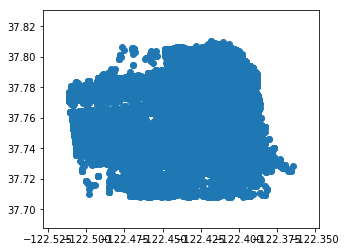

In [52]:
SP_311_PIP.plot()

We will now clean up the associated data frame by removing all of the attributes apart from the category and geometry.

In [53]:
SP_311_PIP = SP_311_PIP[["Category", "geometry"]] #subset data
SP_311_PIP.head()

,Category,geometry
2,Abandoned Vehicle,POINT (-122.3646709 37.72861809)
3,Graffiti Public Property,POINT (-122.3658033 37.72527763)
4,Street and Sidewalk Cleaning,POINT (-122.3658505 37.72541079)
8,Street and Sidewalk Cleaning,POINT (-122.3679682 37.72533720000001)
9,Street and Sidewalk Cleaning,POINT (-122.3690208 37.72709461)


The `intersects()` method was used to clip a dataset to an extent earlier, essentially a [point in polygon](https://en.wikipedia.org/wiki/Point_in_polygon) function. In contrast, the spatial join (`sjoin()`) function performs the point in polygon action and has a really useful feature that it also appends the attributes of the polygon to the point. For example, we might be interested in finding out which census tracts each of the 311 calls resides within. As such, we will implement another point in polygon analysis to create a new object `SF_clipped_311`:

In [ ]:
SF_clipped_311 = gpd.sjoin(SP_311_PIP, SF, how='inner') # point in polygon
#Cleanup the attributes
SF_clipped_311 = SF_clipped_311[["GEOID10","Category","geometry"]]
#Show the top rows of the data
SF_clipped_311.head()

## Writing out and saving your data

In order to share data it is often useful to write data frames or spatial objects back out of Python as external files. This is very simple, and Python supports multiple formats. In these examples, a CSV file and a Shapefile are both created.

In [ ]:
#In this example we write out a CSV file the geo data frame SF_clipped_311
SF_clipped_311.to_csv("data/311_Tract_Coded.csv")

This has created a CSV file "311_Tract_Coded.csv" in your working directory; we will use this in the next practical class - "Basic SQL".

It is also possible to write out a Shapefile

In [ ]:
#This will write out a Shapefile for San Francisco - note, as the column names are a little longer than are allowed within a Shapefile and as such are automatically shortened.
SF_clipped.to_file("data/SF_clipped.shp") #the default is Shapefile, but other spatial formats are supported

# Further resources / training
* [Data Manipulation with Python](https://www.datacamp.com/tracks/data-manipulation-with-python) - More ways of manipulating data in Python using the Pandas package. Many of these techniques also work with GeoPandas.